In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

In [4]:
# https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts
#eu_nuts3 = gpd.read_file("data/NUTS_RG_20M_2021_3035.geojson")
eu_nuts3 = gpd.read_file("data/NUTS_RG_20M_2016_3035.geojson")
de_nuts3 = eu_nuts3.query("CNTR_CODE == 'DE' and LEVL_CODE == 3")
de_nuts3

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
326,DE254,DE254,3,DE,"Nürnberg, Kreisfreie Stadt","Nürnberg, Kreisfreie Stadt",4,1,3,DE254,"POLYGON ((4395582.127 2936362.696, 4406400.516..."
327,DE255,DE255,3,DE,"Schwabach, Kreisfreie Stadt","Schwabach, Kreisfreie Stadt",4,1,3,DE255,"POLYGON ((4399487.535 2914611.100, 4399340.230..."
328,DE256,DE256,3,DE,"Ansbach, Landkreis","Ansbach, Landkreis",4,3,3,DE256,"POLYGON ((4371588.633 2925060.496, 4384059.306..."
329,DE257,DE257,3,DE,Erlangen-Höchstadt,Erlangen-Höchstadt,4,1,3,DE257,"POLYGON ((4387812.619 2962178.867, 4400140.051..."
445,DE234,DE234,3,DE,Amberg-Sulzbach,Amberg-Sulzbach,4,2,3,DE234,"POLYGON ((4474092.637 2939442.417, 4461918.293..."
...,...,...,...,...,...,...,...,...,...,...,...
1121,DEA11,DEA11,3,DE,"Düsseldorf, Kreisfreie Stadt","Düsseldorf, Kreisfreie Stadt",4,1,3,DEA11,"POLYGON ((4100976.675 3117512.461, 4093331.095..."
1122,DEA12,DEA12,3,DE,"Duisburg, Kreisfreie Stadt","Duisburg, Kreisfreie Stadt",4,1,3,DEA12,"POLYGON ((4099352.022 3154232.407, 4100273.822..."
1123,DEA13,DEA13,3,DE,"Essen, Kreisfreie Stadt","Essen, Kreisfreie Stadt",4,1,3,DEA13,"POLYGON ((4113603.038 3162257.265, 4119892.559..."
1124,DEA14,DEA14,3,DE,"Krefeld, Kreisfreie Stadt","Krefeld, Kreisfreie Stadt",4,1,3,DEA14,"POLYGON ((4086932.111 3147851.917, 4091546.764..."


In [5]:
# read zenus data
zensus_df = pd.read_excel("data/Kreisbericht_2017_ZENSUS.xlsx", sheet_name="Kreisfreie_Städte_u._Landkreise", header=3)#[3,4,6])
has_value = ~zensus_df['NUTS3 1)'].isna()
zensus_df = zensus_df.loc[has_value,:]
zensus_df = zensus_df.iloc[1:,:].set_index("NUTS3 1)")
zensus_df

,Schlüssel-nummer,Regionale Bezeichnung,Kreisfreie Stadt,Fläche \nin km2 2),Bevölkerung 3),Unnamed: 6,Unnamed: 7,Unnamed: 8
NUTS3 1),,,,,,,,
DEF01,01001,Kreisfreie Stadt,"Flensburg, Stadt",56.73,88519,44086,44433,1560
DEF02,01002,Kreisfreie Stadt,"Kiel, Landeshauptstadt",118.65,247943,120809,127134,2090
DEF03,01003,Kreisfreie Stadt,"Lübeck, Hansestadt",214.19,216318,103884,112434,1010
DEF04,01004,Kreisfreie Stadt,"Neumünster, Stadt",71.66,79335,39190,40145,1107
DEF05,01051,Kreis,Dithmarschen,1428.17,133447,65911,67536,93
...,...,...,...,...,...,...,...,...
DEG0I,16073,Landkreis,Saalfeld-Rudolstadt,1036.03,107368,52876,54492,104
DEG0J,16074,Landkreis,Saale-Holzland-Kreis,815.24,82990,41320,41670,102
DEG0K,16075,Landkreis,Saale-Orla-Kreis,1151.30,81501,40376,41125,71


In [6]:
zensus_df.loc[de_nuts3.NUTS_ID,:]

,Schlüssel-nummer,Regionale Bezeichnung,Kreisfreie Stadt,Fläche \nin km2 2),Bevölkerung 3),Unnamed: 6,Unnamed: 7,Unnamed: 8
NUTS3 1),,,,,,,,
DE254,09564,Kreisfreie Stadt,Nürnberg,186.45,515201,250702,264499,2763
DE255,09565,Kreisfreie Stadt,Schwabach,40.80,40781,19885,20896,1000
DE256,09571,Landkreis,Ansbach,1971.33,183256,92126,91130,93
DE257,09572,Landkreis,Erlangen-Höchstadt,564.56,135334,67259,68075,240
DE234,09371,Landkreis,Amberg-Sulzbach,1255.87,102836,51452,51384,82
...,...,...,...,...,...,...,...,...
DEA11,05111,Kreisfreie Stadt,"Düsseldorf, Stadt",217.41,617280,298330,318950,2839
DEA12,05112,Kreisfreie Stadt,"Duisburg, Stadt",232.80,498110,246183,251927,2140
DEA13,05113,Kreisfreie Stadt,"Essen, Stadt",210.34,583393,283206,300187,2774


In [7]:
# source: http://opendatalab.de/projects/geojson-utilities/
# based on 2018 data from https://gdz.bkg.bund.de/index.php/default/digitale-geodaten/verwaltungsgebiete/nuts-gebiete-1-5-000-000-stand-31-12-nuts5000-31-12.html
gdf = gpd.read_file("Data\landkreise_simplify200.geojson")


In [8]:
gdf.loc[:,"stat_bnd_amt_id"] = gdf["AGS"].apply(lambda x: x[:5])

# remove some columns and reduce to actual nuts3
gdf.drop(columns=['WSK','DEBKG_ID','IBZ', 'BEM', 'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1','SN_V2', 'SN_G', 'FK_S3','ADE', 'GF', 'BSG', 'RS', 'AGS', 'SDV_RS',"RS_0","AGS_0"], inplace=True)
gdf.index = gdf["stat_bnd_amt_id"]
gdf = gdf.loc[gdf.index.drop_duplicates(),:]

# expand dict stored in "destatis" column containing population information
geo_df = pd.concat([gdf.drop(columns="destatis"), gdf["destatis"].apply(pd.Series)],axis=1)
geo_df = geo_df.loc[~geo_df.index.duplicated(),:]
geo_df.set_index("NUTS",inplace=True)
# there are 401 nuts3 regions
assert len(geo_df)==401

In [9]:
geo_df[geo_df['stat_bnd_amt_id']=='07140']

,GEN,BEZ,geometry,stat_bnd_amt_id,population,population_m,population_w
NUTS,,,,,,,
DEB1D,Rhein-Hunsrück-Kreis,Landkreis,"POLYGON ((7.55434 50.25705, 7.56750 50.25869, ...",07140,102937,51206,51731


In [10]:
geo_df["population_diff_zensus"] = zensus_df["Bevölkerung 3)"] - geo_df["population"]
geo_df["population_old"] = geo_df["population"].copy()
geo_df["population"] = zensus_df["Bevölkerung 3)"]

C:\Users\david\.conda\envs\voll\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Text(0.5, 1.0, 'Einwohnerzahldifferenz')

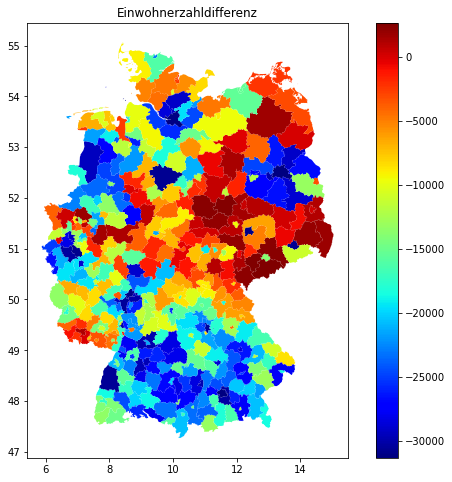

In [11]:

vmin = min(geo_df["population_diff_zensus"])
vmax = max(geo_df["population_diff_zensus"])
fig, ax = plt.subplots(figsize=(10,8))
geo_df.plot(ax=ax,column="population_diff_zensus", cmap="jet")
sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm)
ax.set_title("Einwohnerzahldifferenz")
#fig.savefig("Data\plots\gross_hourly_wages.png")

In [12]:
geo_df.set_index("stat_bnd_amt_id",inplace=True)

In [13]:
# avalailable until 2020
# https://statistik.arbeitsagentur.de/SiteGlobals/Forms/Suche/Einzelheftsuche_Formular.html;jsessionid=F06C60836859355E3CC8FEBA194A5977?submit=Suchen&topic_f=beschaeftigung-entgelt-entgelt
entgeld_df = pd.read_excel("Data/entgelt-d-0-201712-xlsm.xlsm",sheet_name="16.2",)

In [14]:
#  this contains the proper column names
entgeld_df.loc[5:8,:]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Beschäftigungsstatistik
5,Region,NaN,Median der erzielten Entgelte (in €),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Insgesamt (Arbeitsort),davon:,NaN,darunter:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insgesamt (Wohnort)
7,NaN,NaN,NaN,Männer,Frauen,Deutsche,Ausländer,15 bis unter \n25 Jahre,25 bis unter \n55 Jahre,55 bis unter \n65 Jahre,ohne Berufs-abschluss,anerkannter\nBerufsabschluss,akademischer\nBerufsabscluss,NaN
8,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12


In [15]:
cols = ["Region", "ID", entgeld_df.iloc[6,2], *entgeld_df.iloc[7,3:13].to_list(), entgeld_df["Beschäftigungsstatistik"][6]]
#entgeld_df.columns = cols

In [16]:
entgeld_df.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Beschäftigungsstatistik
407,Saale-Holzland-Kreis,16074.0,2288.4329,2303.233119,2249.004274,2314.51699,X,X,2312.161342,2303.625,X,2229.628959,3780.045455,2493.426566
408,Saale-Orla-Kreis,16075.0,2253.4,2329.361257,1985.101449,2281.69877,X,X,2278.041209,2257.612069,X,2219.815895,3536.790323,2327.764151
409,Greiz,16076.0,2232.84714,2284.925134,2107.40184,2247.760956,X,X,2239.42663,2285.184685,X,2178.811567,3707.642857,2341.447467
410,Altenburger Land,16077.0,2218.245098,2256.022388,2112.764151,2230.75,X,X,2224.71466,2264.27551,X,2160.965116,3694.944444,2322.978992
411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,© Statistik der Bundesagentur für Arbeit


In [17]:
df = pd.DataFrame(entgeld_df.iloc[10:-1,:].values, columns=cols) #FK - was 10:-1 before; DH 10:-1 should be right, otherwise
df.loc[:,"ID"]=df["ID"].astype(int).apply(lambda x: f"{x:05}")
df.set_index("ID", inplace=True)
df.head()

,Region,Insgesamt (Arbeitsort),Männer,Frauen,Deutsche,Ausländer,15 bis unter \n25 Jahre,25 bis unter \n55 Jahre,55 bis unter \n65 Jahre,ohne Berufs-abschluss,anerkannter\nBerufsabschluss,akademischer\nBerufsabscluss,Insgesamt (Wohnort)
ID,,,,,,,,,,,,,
01001,"Flensburg, Stadt",2986.055556,3167.028926,2678.237226,3083.474138,1677.488636,1993.5,2992.490291,3372.760274,1934.875,3015.884615,4468.147059,2758.948276
01002,"Kiel, Landeshauptstadt",3303.962273,3465.306678,3108.004873,3336.632812,2401.141026,2218.510753,3295.898593,3693.397727,2383.108696,3178.778146,4925.837838,3148.856511
01003,"Lübeck, Hansestadt",3035.921109,3121.775605,2881.505587,3105.191211,2008.758929,2115.717391,3055.292561,3323.544693,2154.477273,3012.222798,4793.809859,3022.366925
01004,"Neumünster, Stadt",2841.743194,2896.099022,2674.631944,2873.796501,2235.115385,2173.755814,2872.1133,3012.184783,2323.5,2867.481132,4859.590909,2800.877644
01051,Dithmarschen,2913.626492,3068.581181,2440.717391,2955.242547,1952.473684,2221.333333,2923.9375,3247.6875,2237.596774,2940.836134,5218,2971.936526


In [18]:
# add monthly wages to geo_df
#geo_df.loc[df.index,["brutto_mon_arbeitsort","brutto_mon_wohnort"]] = df.loc[:,["Insgesamt (Arbeitsort)","Insgesamt (Wohnort)"]].astype(float).values
geo_df.loc[df.index,"brutto_mon_arbeitsort"] = df["Insgesamt (Arbeitsort)"].astype(float).values
geo_df.loc[df.index,"brutto_mon_wohnort"] = df["Insgesamt (Wohnort)"].astype(float).values
geo_df.head()

,GEN,BEZ,geometry,population,population_m,population_w,population_diff_zensus,population_old,brutto_mon_arbeitsort,brutto_mon_wohnort
stat_bnd_amt_id,,,,,,,,,,
01001,Flensburg,Kreisfreie Stadt,"POLYGON ((9.41266 54.82264, 9.42293 54.82322, ...",88519,44599,44905,-985,89504,2986.055556,2758.948276
01002,Kiel,Kreisfreie Stadt,"POLYGON ((10.16916 54.43138, 10.18877 54.41108...",247943,120566,126982,395,247548,3303.962273,3148.856511
01003,Lübeck,Kreisfreie Stadt,"POLYGON ((10.87684 53.98737, 10.88454 53.97820...",216318,104371,112827,-880,217198,3035.921109,3022.366925
01004,Neumünster,Kreisfreie Stadt,"POLYGON ((9.99545 54.14972, 10.00821 54.14217,...",79335,39241,40246,-152,79487,2841.743194,2800.877644
01051,Dithmarschen,Kreis,"MULTIPOLYGON (((9.07402 54.36277, 9.08209 54.3...",133447,65720,67490,237,133210,2913.626492,2971.936526


In [19]:
# http://opendata.ffe.de/dataset/electricity-consumption-of-private-households-german-districts/
# available until 2017
demand_df = pd.read_json("data/electricity_demand/opendata_ffe_demandregio_spatial_lk401.json")


In [20]:
# all end with 000
assert sum(demand_df["id_region"].astype(str).str[-3:] == "000") == 401
# so this doesn't incurr dataloss
id_index = demand_df["id_region"].apply(lambda x: f"{x:08}"[:-3])
demand_df.index = id_index
demand_df.head()

,id_spatial,id_region_type,id_region,year,internal_id,value
id_region,,,,,,
01001,4,4,1001000,2017,NaN,137067.442378
01002,4,4,1002000,2017,NaN,383927.889667
01003,4,4,1003000,2017,NaN,334958.088097
01004,4,4,1004000,2017,NaN,122846.457156
01051,4,4,1051000,2017,NaN,206636.303878


In [21]:
geo_df.loc[demand_df.index,"demand [MWh/a_2017]"] = demand_df["value"]

In [22]:
# test if any row is empty
assert geo_df["demand [MWh/a_2017]"].isna().sum() == 0
empty_rows = geo_df.loc[:,["brutto_mon_arbeitsort","brutto_mon_wohnort"]].isna().sum().sum()
assert empty_rows == 0, (empty_rows)

In [23]:
# https://www.statistikportal.de/de/etr/publikationen
# Arbeitsvolumen in den Ländern der Bundesrepublik Deutschland 2000-2021
work_hours_df = pd.read_excel("Data/ETR_R2B2_2018_j.xlsx", sheet_name="Tab 1.3")
colnames = work_hours_df.iloc[0,:]
cols_2_drop = pd.isna(colnames)
work_hours_df = work_hours_df.loc[~pd.isna(work_hours_df.iloc[:,6]),:].iloc[1:,:]
work_hours_df = work_hours_df.drop(columns=work_hours_df.columns[cols_2_drop])
work_hours_df.columns = ["RegionalSchlüssel","nuts3","Bundesland", "nuts-lvl","Stadt/Land/-kreis", *colnames[8:] ]

# correct id from 02, 11 to 02000, 11000
cities = work_hours_df["RegionalSchlüssel"].apply(len) < 5
work_hours_df.loc[cities,"RegionalSchlüssel"] = work_hours_df["RegionalSchlüssel"][cities].apply(lambda x: f"{int(x)*1000:05}")

In [24]:
work_hours_df

,RegionalSchlüssel,nuts3,Bundesland,nuts-lvl,Stadt/Land/-kreis,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
8,08111,DE111,BW,NaN,"Stuttgart, Stadtkreis",1475,1476,1475,1474,1471,...,1424,1441,1449,1436,1432,1432,1429,1421,1419,1425
9,08115,DE112,BW,NaN,"Böblingen, Landkreis",1459,1454,1448,1442,1440,...,1377,1408,1426,1408,1406,1404,1405,1398,1397,1402
10,08116,DE113,BW,NaN,"Esslingen, Landkreis",1443,1438,1437,1432,1432,...,1387,1416,1414,1395,1397,1399,1397,1390,1392,1399
11,08117,DE114,BW,NaN,"Göppingen, Landkreis",1437,1429,1422,1419,1419,...,1374,1404,1410,1393,1394,1399,1398,1390,1389,1395
12,08118,DE115,BW,NaN,"Ludwigsburg, Landkreis",1443,1436,1429,1427,1425,...,1385,1411,1419,1405,1405,1404,1406,1401,1397,1404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,16073,DEG0I,TH,NaN,"Saalfeld-Rudolstadt, Landkreis",1596,1581,1562,1558,1567,...,1504,1533,1530,1503,1483,1481,1486,1471,1462,1446
513,16074,DEG0J,TH,NaN,Saale-Holzland-Kreis,1593,1579,1550,1541,1547,...,1480,1516,1542,1514,1498,1500,1505,1488,1481,1466
514,16075,DEG0K,TH,NaN,Saale-Orla-Kreis,1595,1570,1561,1562,1568,...,1497,1531,1540,1516,1499,1502,1507,1492,1484,1466
515,16076,DEG0L,TH,NaN,"Greiz, Landkreis",1614,1594,1579,1577,1588,...,1518,1544,1547,1518,1503,1503,1505,1488,1476,1462


In [25]:
# calculation of hourly wages
vacation_hours = 254
geo_df.loc[work_hours_df["RegionalSchlüssel"],"Arbeitsstunden pro Arbeiter"] = work_hours_df[2017].values + vacation_hours
geo_df["wohnort stundenlohn"] = geo_df["brutto_mon_wohnort"]/(geo_df["Arbeitsstunden pro Arbeiter"]/12)
geo_df["arbeitsort stundenlohn"] =  geo_df["brutto_mon_arbeitsort"]/(geo_df["Arbeitsstunden pro Arbeiter"]/12)

C:\Users\david\.conda\envs\voll\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Text(0.5, 1.0, 'Bruttolohn(Median) im Wohnort [€/h]')

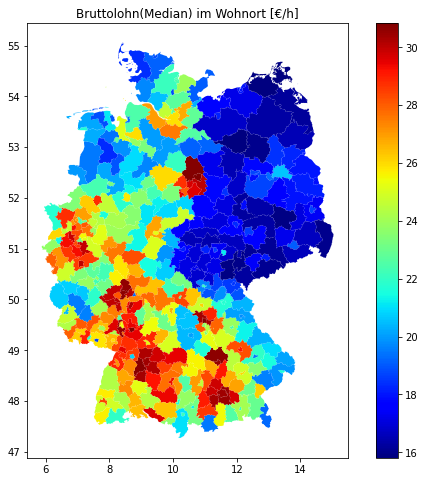

In [26]:

vmin = min(geo_df["wohnort stundenlohn"])
vmax = max(geo_df["wohnort stundenlohn"])
fig, ax = plt.subplots(figsize=(10,8))
geo_df.plot(ax=ax,column="wohnort stundenlohn", cmap="jet")
sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm)
ax.set_title("Bruttolohn(Median) im Wohnort [€/h]")
#fig.savefig("Data\plots\gross_hourly_wages.png")

In [27]:
# get number of employed people
workers_df = pd.read_excel("data/ETR_R2B2_2018_j.xlsx", sheet_name="Tab 1.1")
colnames = workers_df.iloc[0,:]
cols_2_drop = pd.isna(colnames)
workers_df = workers_df.loc[~pd.isna(workers_df.iloc[:,6]),:].iloc[1:,:]
workers_df = workers_df.drop(columns=workers_df.columns[cols_2_drop])
workers_df.columns = ["RegionalSchlüssel","nuts3","Bundesland", "nuts-lvl","Stadt/Land/-kreis", *colnames[8:] ]

# correct id from 02, 11 to 02000, 11000
cities = workers_df["RegionalSchlüssel"].apply(len) < 5
workers_df.loc[cities,"RegionalSchlüssel"] = workers_df["RegionalSchlüssel"][cities].apply(lambda x: f"{int(x)*1000:05}")

In [28]:
geo_df.loc[workers_df["RegionalSchlüssel"],"Erwerbstätige"] = workers_df[2017].values*1000

In [29]:
#The salary for Berlin should be ~24€ (23.68 in 2019) according to the Bundesland-level statistics so the hourly wages are too high
geo_df[geo_df['GEN']=="Berlin"]

,GEN,BEZ,geometry,population,population_m,population_w,population_diff_zensus,population_old,brutto_mon_arbeitsort,brutto_mon_wohnort,demand [MWh/a_2017],Arbeitsstunden pro Arbeiter,wohnort stundenlohn,arbeitsort stundenlohn,Erwerbstätige
stat_bnd_amt_id,,,,,,,,,,,,,,,
11000,Berlin,Kreisfreie Stadt,"POLYGON ((13.47551 52.66878, 13.47565 52.66628...",3613495,1792801,1852025,-31331,3644826,3125.591996,3100.15837,5.595324e+06,1671,22.263256,22.445903,1960186.0


In [30]:
geo_df.loc["01001",:]

GEN                                                                    Flensburg
BEZ                                                             Kreisfreie Stadt
geometry                       POLYGON ((9.412664108896104 54.8226409083269, ...
population                                                                 88519
population_m                                                               44599
population_w                                                               44905
population_diff_zensus                                                      -985
population_old                                                             89504
brutto_mon_arbeitsort                                                2986.055556
brutto_mon_wohnort                                                   2758.948276
demand [MWh/a_2017]                                                137067.442378
Arbeitsstunden pro Arbeiter                                                 1618
wohnort stundenlohn         

In [31]:
import pandas as pd
wage_df = pd.read_csv("data/73111-01-01-4.csv", header=[5,6], sep=";", encoding="cp1252", na_values=["-","."])[:-4]

new_cols = ["year", "bnd_id","name"]
new_cols.extend(wage_df.columns[3:])
wage_df.columns = new_cols
wage_df.head()

,year,bnd_id,name,"(Lohn- und Einkommensteuerpflichtige, Anzahl)","(Gesamtbetrag der Einkünfte, Tsd. EUR)","(Lohn- und Einkommensteuer, Tsd. EUR)"
0,2017,DG,Deutschland,41571281.0,1.693450e+09,303481472.0
1,2017,01,Schleswig-Holstein,1436821.0,5.799140e+07,10084505.0
2,2017,01001,"Flensburg, kreisfreie Stadt",44989.0,1.445809e+06,243191.0
3,2017,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",124549.0,4.214726e+06,706202.0
4,2017,01003,"Lübeck, Hansestadt, kreisfreie Stadt",107513.0,3.782120e+06,648496.0


In [32]:
wage_df.columns

Index([                                           'year',
                                                'bnd_id',
                                                  'name',
       ('Lohn- und Einkommensteuerpflichtige', 'Anzahl'),
              ('Gesamtbetrag der Einkünfte', 'Tsd. EUR'),
               ('Lohn- und Einkommensteuer', 'Tsd. EUR')],
      dtype='object')

In [33]:
wage_df.loc[:,"tax_percentage"] = (wage_df[('Lohn- und Einkommensteuer', 'Tsd. EUR')]/wage_df[('Gesamtbetrag der Einkünfte', 'Tsd. EUR')])+0.205
# stimmt ganz gut überein mit der Steuerbelastung aus https://www.destatis.de/DE/Themen/Staat/Steuern/Lohnsteuer-Einkommensteuer/_inhalt.html#sprg236420
# + 20.5% für Sozialbeiträge in 2017 (8.5% für Krankenversicherung, 9.3% für Rente, 1.5% für Pflegeversicherung, 1.2% für ALV)

# hamburg and berlin
big_cities = (wage_df["bnd_id"] == "02") | (wage_df["bnd_id"] == "11")
wage_df.loc[big_cities,"bnd_id"] = wage_df["bnd_id"][big_cities].apply(lambda x: f"{int(x)*1000:05}")

<AxesSubplot:>

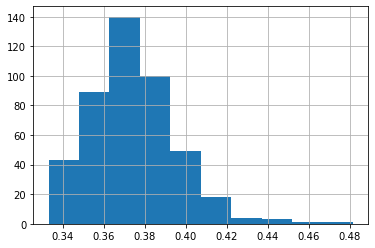

In [34]:
wage_df['tax_percentage'].hist()

In [35]:
wage_df_nuts3 = wage_df.loc[wage_df["bnd_id"].apply(len) == 5,:]
# wage_df_nuts3.reset_index(drop=True) geo_df.stat_bnd_amt_id
wage_df_nuts3 = wage_df_nuts3.set_index("bnd_id")

In [36]:
wage_df_nuts3 = wage_df_nuts3.loc[geo_df.index,:]
wage_df_nuts3.isna().sum()

year                                             0
name                                             0
(Lohn- und Einkommensteuerpflichtige, Anzahl)    0
(Gesamtbetrag der Einkünfte, Tsd. EUR)           0
(Lohn- und Einkommensteuer, Tsd. EUR)            0
tax_percentage                                   0
dtype: int64

In [37]:
wage_df_nuts3.describe()
# berlham["bnd_id"].apply(lambda x: f"{int(x)*1000:05}")

,"(Lohn- und Einkommensteuerpflichtige, Anzahl)","(Gesamtbetrag der Einkünfte, Tsd. EUR)","(Lohn- und Einkommensteuer, Tsd. EUR)",tax_percentage
count,4.010000e+02,4.010000e+02,4.010000e+02,401.000000
mean,1.036690e+05,4.223067e+06,7.568116e+05,0.373827
std,1.258764e+05,5.317670e+06,1.091468e+06,0.021044
min,1.701500e+04,5.732900e+05,8.563800e+04,0.333064
25%,5.107500e+04,1.875335e+06,3.081160e+05,0.359177
50%,7.568800e+04,3.080675e+06,5.020500e+05,0.373307
75%,1.186250e+05,4.678788e+06,8.479610e+05,0.385272
max,1.824268e+06,6.656933e+07,1.227139e+07,0.481478


<AxesSubplot:ylabel='Frequency'>

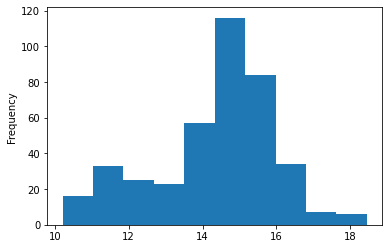

In [38]:
geo_df.loc[wage_df_nuts3.index,"netto_mon_wohnort"] = geo_df.loc[wage_df_nuts3.index,"brutto_mon_wohnort"] * (1-wage_df_nuts3["tax_percentage"])
geo_df.loc[wage_df_nuts3.index,"netto_mon_wohnort_50p"] = geo_df.loc[wage_df_nuts3.index,"brutto_mon_wohnort"] * (0.5)

nettolohn = geo_df["netto_mon_wohnort"]/(geo_df["Arbeitsstunden pro Arbeiter"]/12)
geo_df["wohnort nettolohn [€/h]"] = nettolohn.astype(float)
nettolohn = geo_df["netto_mon_wohnort_50p"]/(geo_df["Arbeitsstunden pro Arbeiter"]/12)
geo_df["wohnort nettolohn [€/h]_50p"] = nettolohn.astype(float)
geo_df["wohnort nettolohn [€/h]"].plot(kind="hist")

In [39]:
#(geo_df["wohnort nettolohn [€/h]_50p"] -geo_df["wohnort nettolohn [€/h]"]).plot(kind="hist")

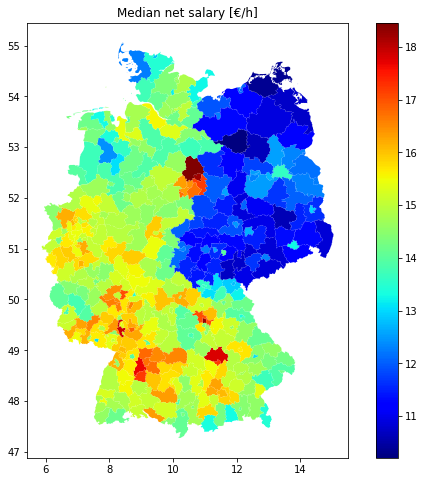

In [40]:

vmin = min(geo_df["wohnort nettolohn [€/h]"])
vmax = max(geo_df["wohnort nettolohn [€/h]"])
fig, ax = plt.subplots(figsize=(10,8))
geo_df.plot(ax=ax,column="wohnort nettolohn [€/h]", cmap="jet")
sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm)
ax.set_title("Median net salary [€/h]")
fig.savefig("results/figures/net_hourly_wages.png")

In [41]:
# calculate Value of Lost Load
voll = ((4745-geo_df["Arbeitsstunden pro Arbeiter"])*geo_df["wohnort nettolohn [€/h]"]*0.5*(geo_df["Erwerbstätige"]+0.5*(geo_df["population"] - geo_df["Erwerbstätige"])))/(geo_df['demand [MWh/a_2017]']*1000)
geo_df["voll"] = voll.astype(float)

# calculate the VoLL with "easy taxes = 50%"
voll_50p = ((4745-geo_df["Arbeitsstunden pro Arbeiter"])*geo_df["wohnort nettolohn [€/h]_50p"]*0.5*(geo_df["Erwerbstätige"]+0.5*(geo_df["population"] - geo_df["Erwerbstätige"])))/(geo_df['demand [MWh/a_2017]']*1000)
geo_df["voll_50p"] = voll_50p.astype(float)

geo_df["voll"].describe()

count    401.000000
mean      10.992734
std        1.804075
min        7.190440
25%       10.207231
50%       11.027039
75%       11.842114
max       18.312210
Name: voll, dtype: float64

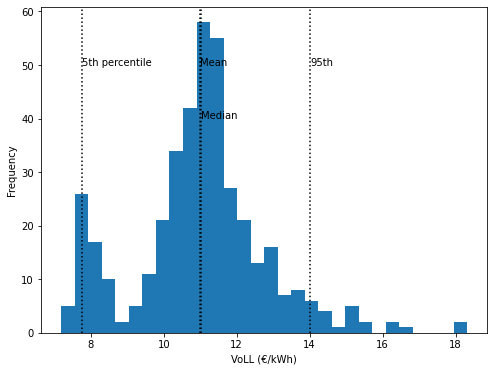

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
ax = geo_df["voll"].plot(kind="hist", bins=30)#, alpha = 0.65
ax.set_xlabel("VoLL (€/kWh)")

mean = geo_df["voll"].mean()
median = geo_df["voll"].median()
quant25 = geo_df["voll"].quantile(0.25)
quant75 = geo_df["voll"].quantile(0.75)
quant5 = geo_df["voll"].quantile(0.05)
quant95 = geo_df["voll"].quantile(0.95)
slices = [mean, median, quant5, quant95]
for i in slices:
    ax.axvline(i, linestyle = ":", color="black")

ax.text(mean, 50, "Mean", size=10) 
ax.text(median, 40, "Median", size=10) 
ax.text(quant5, 50, "5th percentile", size=10) 
ax.text(quant95, 50, "95th", size=10)

plt.show()
# Werte stimmen gut überein mit 3 Studien aus https://www.sciencedirect.com/science/article/pii/S2214629617301184
fig.savefig("results/figures/voll_percentiles.png")

In [43]:
(geo_df['voll']*geo_df['population']).sum()/(geo_df['population'].sum())

11.239728202269914

In [44]:
geo_df.voll.describe()

count    401.000000
mean      10.992734
std        1.804075
min        7.190440
25%       10.207231
50%       11.027039
75%       11.842114
max       18.312210
Name: voll, dtype: float64

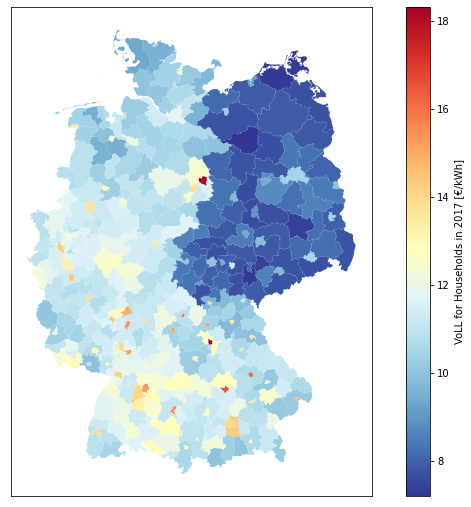

In [51]:
vmin = min(geo_df["voll"])
vmax = max(geo_df["voll"])
fig, ax = plt.subplots(figsize=(12,9))
geo_df.plot(ax=ax,column="voll", cmap='RdYlBu_r',vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='RdYlBu_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm).set_label('VoLL for Households in 2017 [€/kWh]')
# ax.set_title("VoLL in NUTS 3 Regions")
#ax.collections.colorbar.set_label("Eur/kWh")
ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
fig.savefig("results/figures/voll.png")
fig.savefig("results/figures/voll.svg", format="svg")

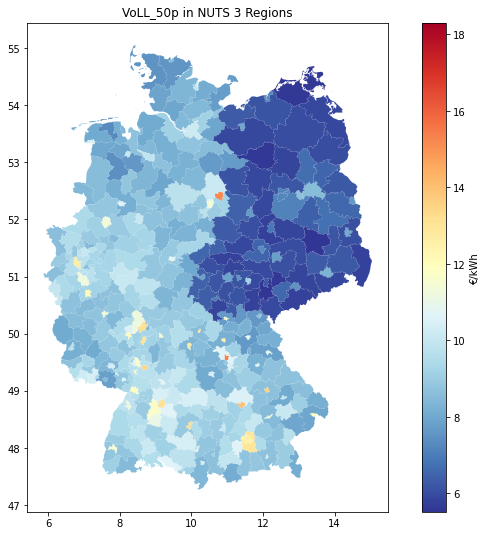

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
geo_df.plot(ax=ax,column="voll_50p", cmap='RdYlBu_r', vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='RdYlBu_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm,ax=ax,).set_label('€/kWh')
# plt.colorbar(ax)
ax.set_title("VoLL_50p in NUTS 3 Regions")
#ax.collections.colorbar.set_label("Eur/kWh")

fig.savefig("results/figures/voll_50p.png")

In [ ]:
geo_df["voll_diff_50p"]=geo_df["voll"]-geo_df["voll_50p"]


stat_bnd_amt_id
01001    2.195858
01002    2.529222
01003    2.177472
01004    2.480034
01051    2.108692
           ...   
16073    1.935234
16074    1.813351
16075    1.914862
16076    1.786037
16077    1.831910
Length: 401, dtype: float64

In [ ]:
# ~average Germany-wide VoLL weighing for population
(geo_df['voll']*geo_df['population']).sum()/(geo_df['population'].sum())

11.239728202269914

In [ ]:
geo_df.columns

Index(['GEN', 'BEZ', 'geometry', 'population', 'population_m', 'population_w',
       'population_diff_zensus', 'population_old', 'brutto_mon_arbeitsort',
       'brutto_mon_wohnort', 'demand [MWh/a_2017]',
       'Arbeitsstunden pro Arbeiter', 'wohnort stundenlohn',
       'arbeitsort stundenlohn', 'Erwerbstätige', 'netto_mon_wohnort',
       'netto_mon_wohnort_50p', 'wohnort nettolohn [€/h]', 'voll'],
      dtype='object')

In [ ]:
# Validation using Growtisch et al. 2013
geo_df[geo_df['GEN'].isin(['Berlin','Hamburg','Bremen'])][['GEN','population','Erwerbstätige','Arbeitsstunden pro Arbeiter','arbeitsort stundenlohn','wohnort nettolohn [€/h]','demand [MWh/a_2017]','voll']]

,GEN,population,Erwerbstätige,Arbeitsstunden pro Arbeiter,arbeitsort stundenlohn,wohnort nettolohn [€/h],demand [MWh/a_2017],voll
stat_bnd_amt_id,,,,,,,,
02000,Hamburg,1830584,1254871.0,1685,25.771891,14.222043,2.834572e+06,11.842821
04011,Bremen,568006,364108.0,1618,25.551287,14.603674,8.795302e+05,12.098968
11000,Berlin,3613495,1960186.0,1671,22.445903,13.595281,5.595324e+06,10.407559


In [ ]:
geo_df.to_csv("results/netto_voll_calculated.csv")

In [ ]:
hourly_hh_demand_df = pd.read_csv("results/load_profiles/nuts3_hh_demand_profiles_dyn.csv")
#id = hourly_hh_demand_df['Date']
#hourly_hh_demand_df.drop(columns="Unnamed: 0",inplace=True)
hourly_hh_demand_df.head()

,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
0,14.588096,40.861469,35.649610,13.074556,21.992315,32.313361,27.268446,33.056618,51.527281,21.233402,...,11.540580,10.534630,17.935387,13.535342,9.288398,17.694447,13.676907,13.431517,16.360705,14.939289
1,10.851525,30.395278,26.518376,9.725660,16.359239,24.036669,20.283950,24.589549,38.329166,15.794713,...,8.584595,7.836307,13.341446,10.068421,6.909283,13.162220,10.173726,9.991190,12.170101,11.112764
2,8.869270,24.842952,21.674247,7.949067,13.370886,19.645874,16.578668,20.097759,31.327552,12.909482,...,7.016441,6.404843,10.904355,8.229216,5.647159,10.757868,8.315285,8.166092,9.946980,9.082788
3,8.238367,23.075785,20.132481,7.383622,12.419767,18.248394,15.399368,18.668134,29.099112,11.991185,...,6.517337,5.949244,10.128690,7.643843,5.245457,9.992623,7.723789,7.585209,9.239416,8.436697
4,8.136608,22.790758,19.883809,7.292421,12.266361,18.022994,15.209159,18.437550,28.739686,11.843072,...,6.436836,5.875760,10.003582,7.549428,5.180666,9.869196,7.628386,7.491519,9.125293,8.332489


In [ ]:
# formula taken from last slide of "prelim_plan.pptx"
hourly_volls = [geo_df["voll"][sample_id] * hourly_hh_demand_df[sample_id]/ hourly_hh_demand_df[sample_id].mean() for sample_id in hourly_hh_demand_df.columns]

In [ ]:
hourly_volls

[0       10.120307
 1        7.528108
 2        6.152944
 3        5.715263
 4        5.644669
           ...    
 8755    17.381148
 8756    18.227197
 8757    17.206794
 8758    16.029186
 8759    12.356307
 Name: 01001, Length: 8760, dtype: float64,
 0       11.609420
 1        8.635802
 2        7.058294
 3        6.556213
 4        6.475232
           ...    
 8755    19.938629
 8756    20.909166
 8757    19.738620
 8758    18.387737
 8759    14.174427
 Name: 01002, Length: 8760, dtype: float64,
 0       10.246793
 1        7.622196
 2        6.229844
 3        5.786694
 4        5.715218
           ...    
 8755    17.598382
 8756    18.455004
 8757    17.421848
 8758    16.229522
 8759    12.510739
 Name: 01003, Length: 8760, dtype: float64,
 0       10.211489
 1        7.595935
 2        6.208380
 3        5.766756
 4        5.695527
           ...    
 8755    17.537749
 8756    18.391420
 8757    17.361823
 8758    16.173606
 8759    12.467635
 Name: 01004, Length: 8760, dtyp

In [ ]:
hourly_voll_df = pd.DataFrame(hourly_volls)
hourly_voll_df = hourly_voll_df.T
hourly_df = pd.read_csv("results/load_profiles/nuts3_hh_demand_profiles.csv")
hourly_voll_df.index = hourly_df['Date']

In [ ]:
hourly_voll_df.head(25)

,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
Date,,,,,,,,,,,,,,,,,,,,,
01.01.2017 00:00,10.120307,11.609420,10.246793,10.211489,9.306248,8.938097,8.715464,9.019140,9.644297,9.426028,...,7.160861,7.223003,7.419954,7.423689,7.736585,7.552093,7.218585,7.164109,6.808876,6.908669
01.01.2017 01:00,7.528108,8.635802,7.622196,7.595935,6.922560,6.648707,6.483099,6.708992,7.174022,7.011661,...,5.326690,5.372914,5.519419,5.522197,5.754948,5.617712,5.369628,5.329106,5.064862,5.139094
01.01.2017 02:00,6.152944,7.058294,6.229844,6.208380,5.658012,5.434183,5.298827,5.483456,5.863539,5.730836,...,4.353660,4.391440,4.511183,4.513454,4.703688,4.591521,4.388755,4.355635,4.139660,4.200332
01.01.2017 03:00,5.715263,6.556213,5.786694,5.766756,5.255537,5.047631,4.921903,5.093398,5.446445,5.323181,...,4.043968,4.079062,4.190287,4.192396,4.369098,4.264910,4.076567,4.045803,3.845191,3.901548
01.01.2017 04:00,5.644669,6.475232,5.715218,5.695527,5.190622,4.985284,4.861109,5.030486,5.379171,5.257430,...,3.994018,4.028678,4.138529,4.140612,4.315132,4.212231,4.026214,3.995830,3.797696,3.853357
01.01.2017 05:00,5.509129,6.319749,5.577984,5.558766,5.065985,4.865577,4.744384,4.909694,5.250007,5.131189,...,3.898114,3.931941,4.039155,4.041188,4.211517,4.111086,3.929537,3.899882,3.706506,3.760830
01.01.2017 06:00,5.797152,6.650151,5.869606,5.849383,5.330839,5.119953,4.992424,5.166377,5.524482,5.399452,...,4.101911,4.137507,4.250325,4.252464,4.431699,4.326018,4.134976,4.103771,3.900286,3.957449
01.01.2017 07:00,7.850015,9.005075,7.948126,7.920742,7.218574,6.933011,6.760321,6.995873,7.480788,7.311484,...,5.554463,5.602664,5.755433,5.758330,6.001034,5.857929,5.599237,5.556982,5.281439,5.358845
01.01.2017 08:00,12.701212,14.570082,12.859954,12.815647,11.679549,11.217511,10.938102,11.319222,12.103808,11.829876,...,8.987041,9.065030,9.312208,9.316895,9.709586,9.478045,9.059485,8.991117,8.545292,8.670534


In [ ]:
# Check: Are timezone changes correctly present?
hourly_voll_df[2015:7228]

,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
Date,,,,,,,,,,,,,,,,,,,,,
25.03.2017 23:00,12.369643,14.189726,12.524242,12.481091,11.374651,10.924675,10.652560,11.023731,11.787835,11.521054,...,8.752432,8.828385,9.069111,9.073675,9.456115,9.230619,8.822985,8.756402,8.322215,8.444188
26.03.2017 00:00,8.860044,10.163720,8.970779,8.939871,8.147358,7.825052,7.630143,7.896003,8.443310,8.252222,...,6.269132,6.323535,6.495961,6.499230,6.773162,6.611645,6.319668,6.271976,5.960979,6.048345
26.03.2017 01:00,6.590646,7.560401,6.673018,6.650027,6.060507,5.820756,5.675771,5.873533,6.280654,6.138511,...,4.663367,4.703835,4.832096,4.834528,5.038295,4.918149,4.700958,4.665482,4.434144,4.499132
26.03.2017 03:00,5.386729,6.179338,5.454053,5.435262,4.953430,4.757474,4.638974,4.800611,5.133363,5.017185,...,3.811506,3.844582,3.949414,3.951401,4.117946,4.019747,3.842231,3.813235,3.624156,3.677272
26.03.2017 04:00,5.003552,5.739779,5.066087,5.048633,4.601075,4.419058,4.308987,4.459127,4.768209,4.660295,...,3.540380,3.571104,3.668478,3.670324,3.825022,3.733808,3.568920,3.541986,3.366357,3.415695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29.10.2017 00:00,11.571983,13.274696,11.716612,11.676244,10.641153,10.220194,9.965626,10.312862,11.027692,10.778115,...,8.188028,8.259083,8.484286,8.488556,8.846334,8.635379,8.254032,8.191742,7.785554,7.899661
29.10.2017 01:00,8.351180,9.579982,8.455555,8.426422,7.679426,7.375631,7.191917,7.442507,7.958381,7.778268,...,5.909073,5.960352,6.122875,6.125956,6.384155,6.231914,5.956707,5.911754,5.618619,5.700967
29.10.2017 02:00,6.212122,7.126181,6.289763,6.268092,5.712430,5.486449,5.349791,5.536195,5.919934,5.785955,...,4.395533,4.433677,4.554571,4.556864,4.748928,4.635682,4.430965,4.397527,4.179475,4.240731


In [ ]:
hourly_voll_df.round(decimals=3).to_csv("results/st_voll.csv", sep=';', decimal=',')